In [1]:
# import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# create our session (link) from python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# find the most recent date in the data set
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent)

('2017-08-23',)


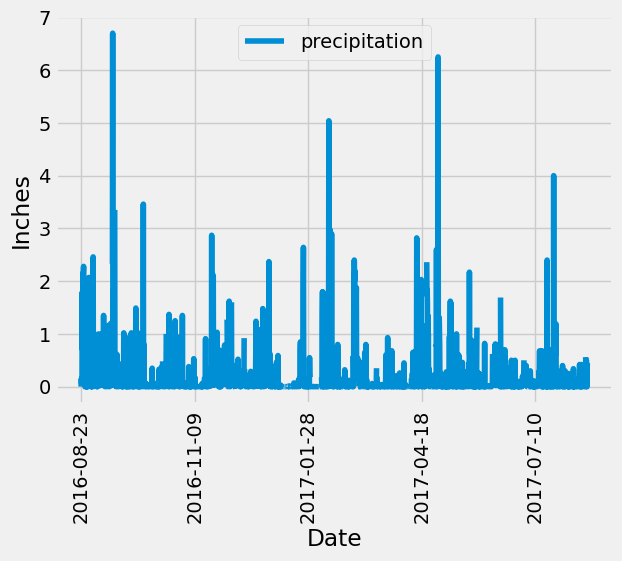

In [10]:
# design a query to retrieve the last 12 months of precipitation data and plot the results. 
# starting from the most recent data point in the database. 

# calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp) \
    .filter(Measurement.date >= start_date) \
    .order_by(Measurement.date).all()

# save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(last_year, columns=['Date', 'precipitation'])
prcp_df.set_index('Date', inplace=True)

# sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date', ascending=True)

# use pandas plotting with matplotlib to plot the data
prcp_df.plot(rot=90, xlabel='Date', ylabel='Inches');

In [11]:
# use pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [13]:
# design a query to find the most active stations (i.e. which stations have the most rows?)
stations = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()).all()

# list the stations and their counts in descending order.
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_9281 = session.query(func.min(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').first()
max_9281 = session.query(func.max(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').first()
avg_9281 = session.query(func.avg(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').first()

# print stats
stats_9281 = [min_9281, max_9281, avg_9281]
stats_9281

[(54.0,), (85.0,), (71.66378066378067,)]

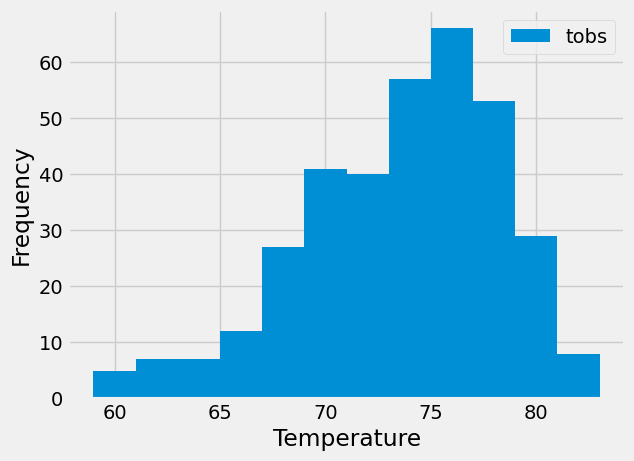

In [15]:
# using the most active station id
# query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_yr_9281 = session.query(Measurement.tobs) \
    .filter(Measurement.station == 'USC00519281') \
    .filter(Measurement.date >= start_date).all()

# create into dataframe
last_yr_9281_df = pd.DataFrame(last_yr_9281, columns=['tobs'])

# configure histogram
last_yr_9281_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# close session
session.close()